# Lab: Regressão Linear simples do Zero

Este notebook tem o intuito de representar visualmente a entrega do laboratorio da disciplina Aprendizado de Maquina do curso de pos-graduacao de Ciencia da Computacao.

## Questao 01

Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente. Gere um plot mostrando o RSS (eixo y) por iteração (eixo x).

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
RSS:  0.010029093861364507
RSS:  0.35972953754654813
RSS:  1.0218531855039414
RSS:  1.9711035610089773
RSS:  3.1840045735931626
RSS:  4.63877772165536
RSS:  6.315227246797997
RSS:  8.19463273929488
RSS:  10.25964872496789
RSS:  12.494210792746486
RSS:  14.883447849418989
RSS:  17.41360011366371
RSS:  20.07194248547061
RSS:  22.84671294962375
RSS:  25.727045693099193
RSS:  28.702908636125365
RSS:  31.7650450953302
RSS:  34.90491931493565
RSS:  38.11466561842363
RSS:  41.38704094855307
RSS:  44.715380578116196
RSS:  48.09355678744069
RSS:  51.51594031742727
RSS:  54.97736441890864
RSS:  58.473091330375375
RSS:  61.99878102667979
RSS:  65.55046209124347
RSS:  69.12450457359716
RSS:  72.71759470280973
RSS:  76.32671133555188
RSS:  79.94910402522221
RSS:  83.58227260576857
RSS:  87.22394819059726
RSS:  90.87207549330164
RSS:  94.52479638288646
RSS:  98.18043459173981
RSS:  101.83748149983212
RSS:  105.494582923

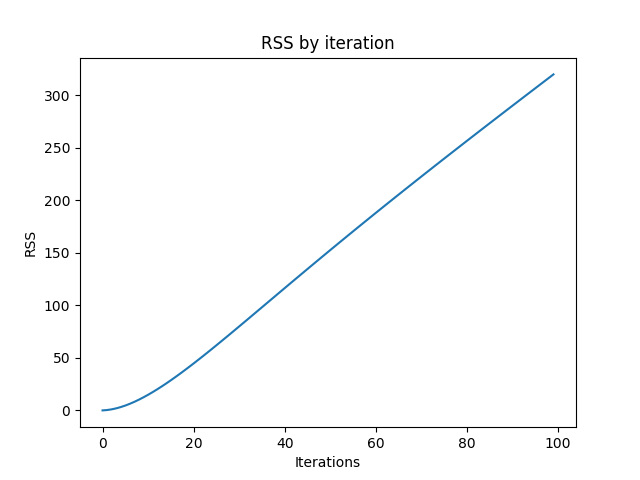

In [8]:

from numpy import *
import matplotlib.pyplot as plt

def compute_erros_for_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m*x + b))**2

    return totalError / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    # gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((current_m*x) + current_b))
        m_gradient += -(2/N) * x * (y - ((current_m*x) + current_b))

    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return[new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    y_values = []

    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        rss = i*m + b
        y_values.append(rss)
        print("RSS: ", rss)

    return [b, m, y_values]

def plot_graph(x_values, y_values):
    # x axis values
    x = x_values
    # corresponding y axis values
    y = y_values

    # plotting the points 
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('Iterations')
    # naming the y axis
    plt.ylabel('RSS')

    # giving a title to my graph
    plt.title('RSS by iteration')

    # function to show the plot
    plt.show()
    

def run():
    points = genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 0.0001

    # y = mx + b
    initial_b = 0
    initial_m = 0
    num_iterations = 100
    x_values = []
    y_values = []

    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_erros_for_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m, y_values] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_erros_for_given_points(b, m, points)))
    
    for i in range(num_iterations):
        x_values.append(i)
        
    plot_graph(x_values, y_values)
    

if __name__ == '__main__':
    run()

## Questao 02
Teste valores pequenos, médios e grandes de alpha (learning rate). O que acontece com o RSS durante as iterações em cada caso? Por que?

### Primeiro caso: Learning Rate = 0.002

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...

Learning Rate:  0.0002

RSS:  0.020058187722729014
RSS:  0.6994719481181992
RSS:  1.933441242462074
RSS:  3.6321072792402016
RSS:  5.718548227114117
RSS:  8.12703351070983
RSS:  10.801504220729687
RSS:  13.694251166176365
RSS:  16.764765608367476
RSS:  19.978740801916988
RSS:  23.307205178095508
RSS:  26.72577038601547
RSS:  30.213979496623796
RSS:  33.75474250850526
RSS:  37.33384790381759
RSS:  40.93954041443406
RSS:  44.56215639645915
RSS:  48.19380929674851
RSS:  51.828118646429466
RSS:  55.45997684998301
RSS:  59.085348768559896
RSS:  62.701099735481364
RSS:  66.30484820142189
RSS:  69.89483969635081
RSS:  73.46983922350607
RSS:  77.02903957503314
RSS:  80.57198338607988
RSS:  84.09849702991875
RSS:  87.60863470619545
RSS:  91.10263129217067
RSS:  94.58086271678032
RSS:  98.04381278295419
RSS:  101.49204550794616
RSS:  104.92618217710854
RSS:  108.34688241593138
RSS:  111.75482868031588
RSS:  115.150

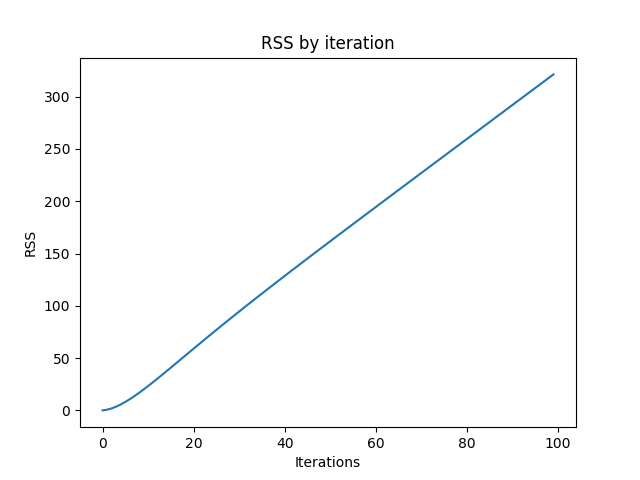

In [23]:

from numpy import *
import matplotlib.pyplot as plt

def compute_erros_for_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m*x + b))**2

    return totalError / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    # gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((current_m*x) + current_b))
        m_gradient += -(2/N) * x * (y - ((current_m*x) + current_b))

    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return[new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    y_values = []
    
    print("")
    print("Learning Rate: ", learning_rate)
    print("")
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        rss = i*m + b
        y_values.append(rss)
        print("RSS: ", rss)

    return [b, m, y_values]

def plot_graph(x_values, y_values):
    # x axis values
    x = x_values
    # corresponding y axis values
    y = y_values

    # plotting the points 
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('Iterations')
    # naming the y axis
    plt.ylabel('RSS')

    # giving a title to my graph
    plt.title('RSS by iteration')

    # function to show the plot
    plt.show()
    

def run():
    points = genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 0.0002

    # y = mx + b
    initial_b = 0
    initial_m = 0
    num_iterations = 100
    x_values = []
    y_values = []

    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_erros_for_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m, y_values] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_erros_for_given_points(b, m, points)))
    
    for i in range(num_iterations):
        x_values.append(i)
        
    plot_graph(x_values, y_values)
    

if __name__ == '__main__':
    run()

Neste caso, o RSS se mantem linear a medida em que ocorrem as iteracoes.

### Segundo caso: Learning Rate = 0.0038

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...

Learning Rate:  0.0038

RSS:  0.38110556673185125
RSS:  -0.38122783658388415
RSS:  14.366480903956232
RSS:  -2.198733943945642
RSS:  29.910698321158105
RSS:  -5.677614931935981
RSS:  47.25391126474885
RSS:  -11.074057680378518
RSS:  66.6693146010652
RSS:  -18.679359262638144
RSS:  88.46740674499871
RSS:  -28.82444547740633
RSS:  113.00077960865666
RSS:  -41.88494808982743
RSS:  140.669499921032
RSS:  -58.28690797782377
RSS:  171.9271529653389
RSS:  -78.51317929848803
RSS:  207.28762814663978
RSS:  -103.11061862727408
RSS:  247.3327351384545
RSS:  -132.6981528847418
RSS:  292.7207497743213
RSS:  -167.9758308690643
RSS:  344.1960004725212
RSS:  -209.734975487942
RSS:  402.59961894712666
RSS:  -258.8695674763526
RSS:  468.88159341956276
RSS:  -316.3890066584794
RSS:  544.1142786726792
RSS:  -383.43241384333254
RSS:  629.5075352739434
RSS:  -461.2846554344731
RSS:  726.4256903472576
RSS:  -551.3942940079323
R

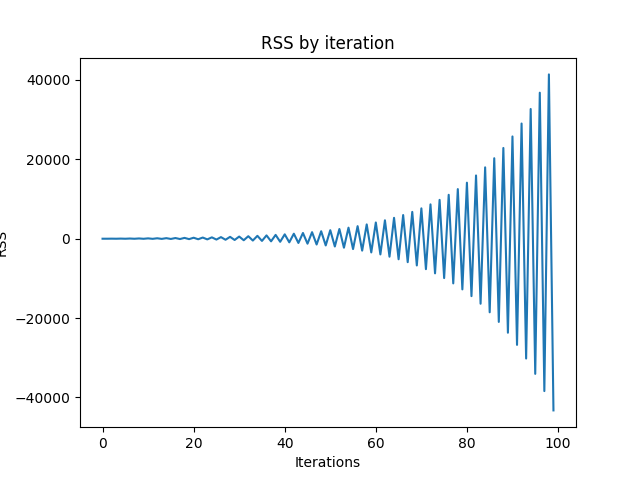

In [20]:

from numpy import *
import matplotlib.pyplot as plt

def compute_erros_for_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m*x + b))**2

    return totalError / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    # gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((current_m*x) + current_b))
        m_gradient += -(2/N) * x * (y - ((current_m*x) + current_b))

    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return[new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    y_values = []
    
    print("")
    print("Learning Rate: ", learning_rate)
    print("")
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        rss = i*m + b
        y_values.append(rss)
        print("RSS: ", rss)

    return [b, m, y_values]

def plot_graph(x_values, y_values):
    # x axis values
    x = x_values
    # corresponding y axis values
    y = y_values

    # plotting the points 
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('Iterations')
    # naming the y axis
    plt.ylabel('RSS')

    # giving a title to my graph
    plt.title('RSS by iteration')

    # function to show the plot
    plt.show()
    

def run():
    points = genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 0.0038

    # y = mx + b
    initial_b = 0
    initial_m = 0
    num_iterations = 100
    x_values = []
    y_values = []

    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_erros_for_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m, y_values] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_erros_for_given_points(b, m, points)))
    
    for i in range(num_iterations):
        x_values.append(i)
        
    plot_graph(x_values, y_values)
    

if __name__ == '__main__':
    run()

Neste caso, o RSS comeca a oscilar de forma gradual ao longo das iteracoes.

### Terceiro caso: Learning Rate = 0.005

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...

Learning Rate:  0.005

RSS:  0.5014546930682253
RSS:  -6.49775366692163
RSS:  39.27865518036013
RSS:  -72.51360546017858
RSS:  198.62538146715258
RSS:  -376.30794141813976
RSS:  817.8943663871371
RSS:  -1556.3479360969066
RSS:  3086.8735557679506
RSS:  -5812.282829066878
RSS:  11045.103069483594
RSS:  -20520.23931969975
RSS:  38094.89705127861
RSS:  -69927.26930672345
RSS:  127937.0793205397
RSS:  -232531.22522672065
RSS:  421150.3566316862
RSS:  -759409.3398665272
RSS:  1365071.281419331
RSS:  -2445801.7854326647
RSS:  4370559.566322942
RSS:  -7790125.79409866
RSS:  13854405.215406246
RSS:  -24588288.216266233
RSS:  43556890.176718645
RSS:  -77024908.1011376
RSS:  135992624.6238071
RSS:  -239749867.53323478
RSS:  422093390.9825388
RSS:  -742175093.9729241
RSS:  1303436395.7104049
RSS:  -2286610877.07038
RSS:  4007230706.612265
RSS:  -7015742356.825835
RSS:  12271718865.255156
RSS:  -21446805317.164352
RS

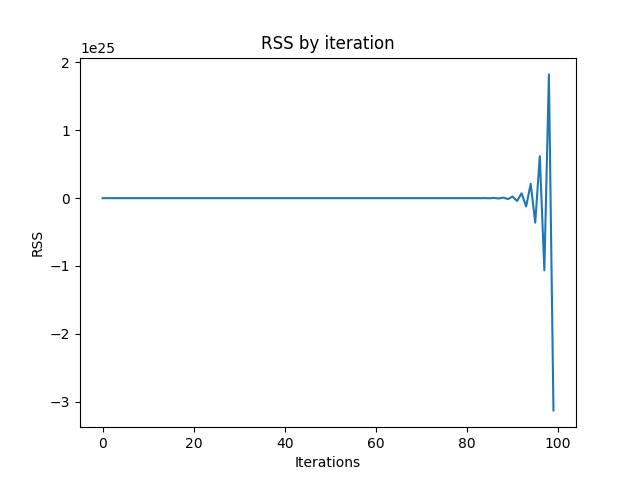

In [22]:

from numpy import *
import matplotlib.pyplot as plt

def compute_erros_for_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m*x + b))**2

    return totalError / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    # gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((current_m*x) + current_b))
        m_gradient += -(2/N) * x * (y - ((current_m*x) + current_b))

    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return[new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    y_values = []
    
    print("")
    print("Learning Rate: ", learning_rate)
    print("")
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        rss = i*m + b
        y_values.append(rss)
        print("RSS: ", rss)

    return [b, m, y_values]

def plot_graph(x_values, y_values):
    # x axis values
    x = x_values
    # corresponding y axis values
    y = y_values

    # plotting the points 
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('Iterations')
    # naming the y axis
    plt.ylabel('RSS')

    # giving a title to my graph
    plt.title('RSS by iteration')

    # function to show the plot
    plt.show()
    

def run():
    points = genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 0.005

    # y = mx + b
    initial_b = 0
    initial_m = 0
    num_iterations = 100
    x_values = []
    y_values = []

    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_erros_for_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m, y_values] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_erros_for_given_points(b, m, points)))
    
    for i in range(num_iterations):
        x_values.append(i)
        
    plot_graph(x_values, y_values)
    

if __name__ == '__main__':
    run()

Neste caso, o RSS oscila de forma muito alta no fim das iteracoes.

## Questao 03
Teste valores diferentes do número de iterações e alpha até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

In [61]:

from numpy import *
import matplotlib.pyplot as plt

def compute_erros_for_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m*x + b))**2

    return totalError / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    # gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((current_m*x) + current_b))
        m_gradient += -(2/N) * x * (y - ((current_m*x) + current_b))

    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return[new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    y_values = []
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        rss = i*m + b
        y_values.append(rss)

    return [b, m, y_values]

def plot_graph(x_values, y_values):
    # x axis values
    x = x_values
    # corresponding y axis values
    y = y_values

    # plotting the points 
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('Iterations')
    # naming the y axis
    plt.ylabel('RSS')

    # giving a title to my graph
    plt.title('RSS by iteration')

    # function to show the plot
    plt.show()
    

def run():
    points = genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 0.0006

    # y = mx + b
    initial_b = 0
    initial_m = 0
    num_iterations = 85000
    x_values = []
    y_values = []

    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_erros_for_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m, y_values] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_erros_for_given_points(b, m, points)))
    
    for i in range(num_iterations):
        x_values.append(i)
        
    

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 85000 iterations b = -39.13610552026829, m = 5.581020209156652, error = 29.833406678676575


Usando Learning Rate = 0.0006 e o numero de iteracoes = 85000

## Questao 04
O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de tolerância que é comparado à norma do gradiente (como no algoritmo dos slides apresentados em sala). 

In [63]:

from numpy import *
from math import sqrt

def compute_erros_for_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m*x + b))**2

    return totalError / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    # gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((current_m*x) + current_b))
        m_gradient += -(2/N) * x * (y - ((current_m*x) + current_b))

    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return[new_b, new_m, b_gradient, m_gradient]

def current_gradient_rate(b_gradient, m_gradient):
    return sqrt((b_gradient**2) + (m_gradient**2))
    
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    b_gradient = 1
    m_gradient = 1
    iterations = 0

    while(current_gradient_rate(b_gradient, m_gradient) > learning_rate):
        b, m, b_gradient, m_gradient = step_gradient(b, m, array(points), learning_rate)
        iterations += 1

    return [b, m, iterations]

def run():
    points = genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 0.0001

    # y = mx + b
    initial_b = 0
    initial_m = 0
    num_iterations = 0

    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_erros_for_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m, num_iterations] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_erros_for_given_points(b, m, points)))
    print(b)
    print(m)

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 1108152 iterations b = -39.44520708690362, m = 5.599420394040617, error = 29.828816251577983
-39.44520708690362
5.599420394040617


## Questao 05
Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

Resposta:  Learning Rate = 0.0001 e Iteracoes = 1108152

## Questao 06
Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

In [68]:

from numpy import *
from math import sqrt
import time

def compute_erros_for_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m*x + b))**2

    return totalError / float(len(points))

def normal_equations(points, initial_b, initial_m, learning_rate, num_iterations):
    tempx = 0
    tempy = 0
    points_xy = array(points)

    for i in range(len(points_xy)):
        tempx += points_xy[i, 0]
        tempy += points_xy[i, 1]

    avg_x = tempx/float(len(points_xy))
    avg_y = tempy/float(len(points_xy))

    a = 0
    b = 0

    for i in range(len(points_xy)):
        a += (points_xy[i, 0] - avg_x)*(points_xy[i, 1] - avg_y)
        b += (points_xy[i, 0] - avg_x)**2

    w1 = a/b
    w0 = avg_y - w1*avg_x

    return[w0, w1, 0]

def run():
    start = time.time()
    points = genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 0.0001

    # y = mx + b
    initial_b = 0
    initial_m = 0
    num_iterations = 0

    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_erros_for_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m, num_iterations] = normal_equations(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_erros_for_given_points(b, m, points)))
    print(b)
    print(m)
    end = time.time()
    print("Time: ", end - start)

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 0 iterations b = -39.44625667909617, m = 5.599482874119919, error = 29.82881619900623
-39.44625667909617
5.599482874119919
Time:  0.007999897003173828


In [69]:

from numpy import *
from math import sqrt
import time

def compute_erros_for_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m*x + b))**2

    return totalError / float(len(points))

def step_gradient(current_b, current_m, points, learning_rate):
    # gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((current_m*x) + current_b))
        m_gradient += -(2/N) * x * (y - ((current_m*x) + current_b))

    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return[new_b, new_m, b_gradient, m_gradient]

def current_gradient_rate(b_gradient, m_gradient):
    return sqrt((b_gradient**2) + (m_gradient**2))
    
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    b_gradient = 1
    m_gradient = 1
    iterations = 0

    while(current_gradient_rate(b_gradient, m_gradient) > learning_rate):
        b, m, b_gradient, m_gradient = step_gradient(b, m, array(points), learning_rate)
        iterations += 1

    return [b, m, iterations]

def run():
    start = time.time()
    points = genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 0.0001

    # y = mx + b
    initial_b = 0
    initial_m = 0
    num_iterations = 0

    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_erros_for_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m, num_iterations] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_erros_for_given_points(b, m, points)))
    print(b)
    print(m)
    end = time.time()
    print("Time: ", end - start)

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 1108152 iterations b = -39.44520708690362, m = 5.599420394040617, error = 29.828816251577983
-39.44520708690362
5.599420394040617
Time:  80.17599987983704
